In [8]:
# Do the necessary imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [9]:
# this block only needs to be run once

# from qiskit import IBMQ
# IBMQ.save_account('2295eb6b30c26aecc9b9ecb0677b769a8e3a606479658709d13cd7301349ce07965760ac5eeb2fbb1e9cb741bdfc881058301125aaa6e1a703beedc07bb9db94')

# provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_quito')

In [ ]:
# superposition, simulate all vectors in R^n

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [ ]:
# diffuser

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [10]:
# oracle

# TODO: now only for two vectors, with a single controlled bit
# def othonormal_swap_oracle(n_qubit):
#     qc = QuantumCircuit(3)

#     # for qubit in range(n_quibit - 1):
        
#     qc.cswap(0,1,2)
    
#     U_o


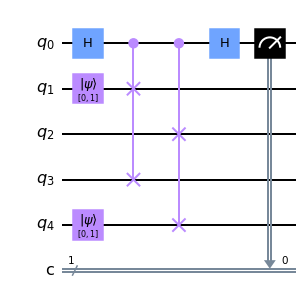

In [28]:
tc = QuantumCircuit(5,1)


tc.h(0)

tc.initialize([0,1], 1) # this is the orthonormal case
tc.initialize([0,1], 4)
tc.cswap(0,1,3)
tc.cswap(0,2,4)
tc.h(0)

tc.measure(0,0)

tc.draw('mpl')

Job Status: job has successfully run


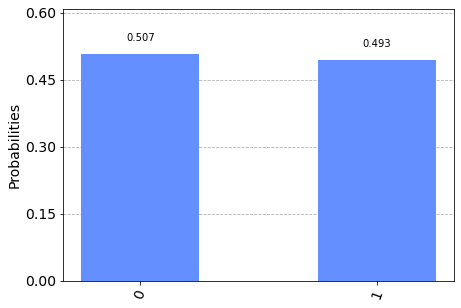

In [29]:
# If q_12 and q_34 are orthonormal in R^2 space
# then the outcome should be 1 with pr around 0.5
# otherwise, as two quantum states approximate to parallel
# the probability of outcome to be 1 will approx to 0

# sample testing result: with [1,0] [0,0]: 0.501 [0], 0.499 [1]
#                             [1,0] [1,0]: 0.697 [0], 0.303 [1]
#                             [1,0] [0,1]: 0.507 [0], 0.493 [1]

t_tc = transpile(tc, backend, optimization_level=3)
job = backend.run(t_tc)
job_monitor(job)  # displays job status under cell

results = job.result().get_counts(tc)
    
plot_histogram(results)